In [1]:
%config Completer.use_jedi = False

In [2]:
import torch
from torch import Tensor
from torch.nn import Linear, MSELoss, functional as F
from torch.optim import SGD, Adam, RMSprop
from torch.autograd import Variable
import numpy as np
from numpy import random
import math
import matplotlib.pyplot as plt

In [110]:
y1 = torch.sin(2.*math.pi*x1) + random.normal(0, 10, (N,))* 0.01
indexes = torch.randperm(y.shape[0])
rand_n = y1
print(rand_n)
print(random.permutation(rand_n))

tensor([-0.8153,  0.5946,  0.2508,  0.7324,  0.8393, -0.5014, -0.4992,  0.2358,
         0.0311,  0.9674], dtype=torch.float64)
[ 0.73241063  0.03108806 -0.49915551  0.59459679  0.83927044  0.96742504
  0.2358489   0.25083176 -0.50136322 -0.81534632]


torch.Size([10, 1])


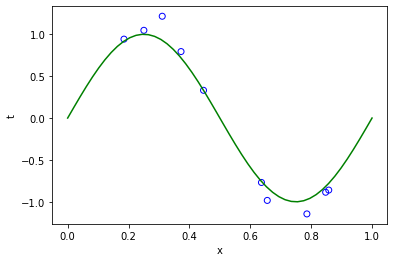

In [152]:
random.seed(12)

N = 10

#Create features
# x = random.uniform(0, 1, (N,)).astype('f')
# x = torch.FloatTensor(torch.from_numpy(x.astype(np.float32)))
x = torch.rand((N,))

#Create Labels
# y = torch.FloatTensor(torch.sin(2*math.pi*x))
#Add noise
# y = (y+random.permutation(random.normal(0, 10, (N,)) * 0.01)).float().unsqueeze(1)
y = (torch.sin(2.*math.pi*x) + random.normal(0, 10, (N,))* 0.01).float().unsqueeze(1)

print(y.shape)

#Create sin(2pi*x) function
t_x = np.linspace(0,1)
t_y = np.sin(2*math.pi*t_x)

#Plot
plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
plt.plot(t_x, t_y,'g-')
plt.xlabel("x")
plt.ylabel("t")
plt.show()

In [144]:
W_out = []
M = [0,1,2,3,4,5,6,7,8,9]

def make_features(x, m):
    x = x.unsqueeze(1)
    return torch.cat([x ** i for i in range(1,m+1)],1)

def polynomial(x, weights):
    total = 0
    for j, w in enumerate(weights):
        total += w * x**j
    return total


class poly_model(torch.nn.Module):
    def __init__(self, m):
        super(poly_model, self).__init__()
        self.poly = torch.nn.Linear(m,1)
    
    def forward(self, x):
        out = self.poly(x).float()
        return out

#Create Test Sets
test_x = random.uniform(0, 1, (N,)).astype('f')
test_x = torch.FloatTensor(torch.from_numpy(test_x.astype(np.float32)))

test_y = torch.FloatTensor(torch.sin(2*math.pi*test_x))
test_y = (test_y+random.permutation(random.normal(0, 10, (N,)) * 0.01)).float().unsqueeze(1)

finished plotting degree 0 polynomial
finished plotting degree 1 polynomial
finished plotting degree 2 polynomial
finished plotting degree 3 polynomial
finished plotting degree 4 polynomial
finished plotting degree 5 polynomial
finished plotting degree 6 polynomial
finished plotting degree 7 polynomial
finished plotting degree 8 polynomial
finished plotting degree 9 polynomial


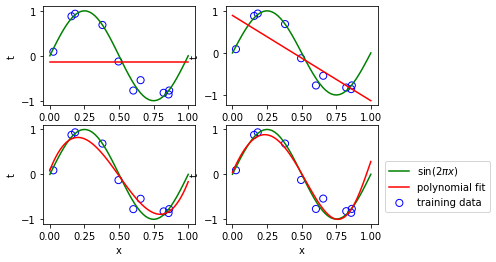

In [145]:
test_losses = {'m':[],
              'train_loss':[],
              'test_loss':[]}

plot_i = 0
for i, m in enumerate(M):
    if m == 0:
        W = torch.mean(y).unsqueeze(0)
    else:

        model = poly_model(m)

        criterion = torch.nn.MSELoss(reduction='sum')
        optimizer = torch.optim.SGD(model.parameters(), lr=.02)

        epochs = 50000
        for epoch in range(epochs):
            output = model(make_features(x, m))
            loss = criterion(output, y)
            print_loss = loss.data

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
#             if epoch % 5000 == 0:
#                 print('epoch : {}  loss : {}'.format(epoch,print_loss))
        W = torch.cat((model.state_dict()['poly.bias'][0].unsqueeze(0),model.state_dict()['poly.weight'][0]))
        
        test_output = model(make_features(test_x, m))
        test_loss = criterion(test_output, test_y)

        test_losses['m'].append(m)
        test_losses['train_loss'].append(print_loss)
        test_losses['test_loss'].append(test_loss.data)
    if m in [0,1,3,9]:
        plot_i += 1
        plt.subplot(2, 2, plot_i)
        plt.scatter(x, y, facecolors = 'none', edgecolors = 'b', s=50, label='training data')
        plt.plot(t_x, t_y,'g-', label = '$\sin(2\pi x)$')
        plt.plot(np.linspace(0,1,100), [polynomial(j, W) for j in np.linspace(0,1,100)], 'r-', label=f'polynomial fit')
        plt.xlabel("x")
        plt.ylabel("t")
    print(f'finished plotting degree {m} polynomial')
    
    
plt.legend(bbox_to_anchor=(1.05,0.64), loc=2, borderaxespad=0.)
plt.show()

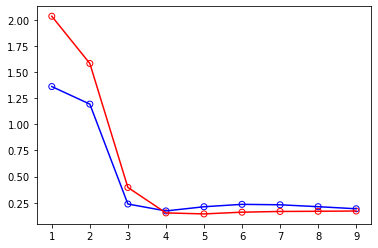

In [146]:
plt.scatter(test_losses['m'], test_losses['train_loss'], facecolors = 'none', edgecolors = 'b')
plt.scatter(test_losses['m'], test_losses['test_loss'], facecolors = 'none', edgecolors = 'r')
plt.plot(test_losses['m'], test_losses['train_loss'], 'b-')
plt.plot(test_losses['m'], test_losses['test_loss'], 'r-')
plt.show()

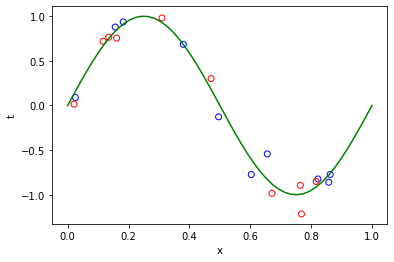

In [147]:
plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
plt.scatter(test_x, test_y, facecolors = 'none', edgecolors = 'r')
plt.plot(t_x, t_y,'g-')
plt.xlabel("x")
plt.ylabel("t")
plt.show()

## Sanity Baseline
##### Numpy W* solver overfitting

/home/marmar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


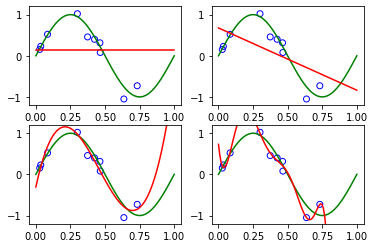

In [148]:
import numpy
x = random.uniform(0, 1, (N,)).astype('f')
y = numpy.sin(2*math.pi*x)
#Add noise
y = y+random.permutation(random.normal(0, 10, (N,)) * 0.01)
for i,m in enumerate([0,1,3,9]):
    plt.subplot(2,2,i+1)
    mymodel = numpy.poly1d(numpy.polyfit(x, y, m))

    myline = numpy.linspace(0, 1, 100)

    plt.scatter(x, y, facecolors = 'none', edgecolors = 'b')
    plt.plot(t_x, t_y,'g-')
    plt.plot(myline, mymodel(myline), 'r-')
    plt.ylim(-1.2,1.2)
plt.show()

In [149]:
x_test = random.uniform(0,1,(N,)).astype('f')
y_test = numpy.sin(2*math.pi*x_test)
y_test = y_test+random.permutation(random.normal(0, 10, (N,)) * 0.01)

def SSE(preds, targets):
    error = 0
    for y, t in zip(preds, targets):
        error += (y - t)**2
    return 0.5 * error

def RMSerror(features, targets):
    return (2*SSE(features, targets)/len(targets))**0.5

np_train_losses = []
np_test_losses = []

for i in range(10):
    mymodel = numpy.poly1d(numpy.polyfit(x, y, i))
    np_train_losses.append(RMSerror(mymodel(x), y))
    preds = [mymodel(x_i) for x_i in x_test]
    np_test_losses.append(RMSerror(preds, y_test))

/home/marmar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/marmar/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


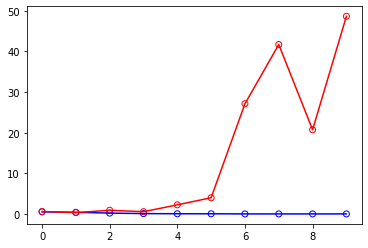

In [150]:
plt.scatter(range(10), np_train_losses, facecolors = 'none', edgecolors = 'b')
plt.scatter(range(10), np_test_losses, facecolors = 'none', edgecolors = 'r')

plt.plot(range(10), np_train_losses, 'b-')
plt.plot(range(10), np_test_losses, 'r-')
plt.show()

## Adding L2 Norm Regularization

finished plotting polynomial with lambda of 0.0005
finished plotting polynomial with lambda of 0.005
finished plotting polynomial with lambda of 0.05
finished plotting polynomial with lambda of 0.5


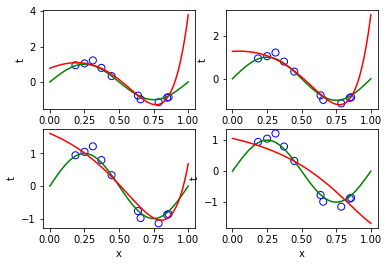

In [154]:
for i, l in enumerate([0.0005, 0.005, 0.05, 0.5]):
    plt.subplot(2,2,i+1)
    model = poly_model(9)

    criterion = torch.nn.MSELoss(reduction='sum')
    optimizer = torch.optim.SGD(model.parameters(), lr=.02, weight_decay=l)

    epochs = 50000
    for epoch in range(epochs):
        output = model(make_features(x, m))
        loss = criterion(output, y)
        print_loss = loss.data

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
#             if epoch % 5000 == 0:
#                 print('epoch : {}  loss : {}'.format(epoch,print_loss))
    W = torch.cat((model.state_dict()['poly.bias'][0].unsqueeze(0),model.state_dict()['poly.weight'][0]))
    plt.scatter(x, y, facecolors = 'none', edgecolors = 'b', s=50, label='training data')
    plt.plot(t_x, t_y,'g-', label = '$\sin(2\pi x)$')
    plt.plot(np.linspace(0,1,100), [polynomial(j, W) for j in np.linspace(0,1,100)], 'r-', label=f'polynomial fit')
    plt.xlabel("x")
    plt.ylabel("t")
    print(f'finished plotting polynomial with lambda of {l}')
plt.show()